In [12]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

df = X

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [13]:
import plotly.express as px
# Correlation
df_corr = df.corr().round(1)  
# Mask to matrix
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Viz
df_corr_viz = df_corr.mask(mask).dropna(how='all').dropna(how='all')
fig = px.imshow(df_corr_viz, text_auto=True)
fig.update_layout(height = 900, width=900)
fig.show()

In [16]:
import plotly.graph_objects as go

fig = go.Figure()
for i in df.columns:
    fig.add_trace(go.Box(y=df[str(i)], name=str(i)))
fig.update_layout(showlegend=False,height = 700, width=800)
fig.show()

In [17]:
standard = (df-df.mean())/df.std()

fig = go.Figure()
for i in standard.columns:
    fig.add_trace(go.Box(y=standard[str(i)], name=str(i)))
fig.update_layout(showlegend=False,height = 700, width=800)
fig.show()

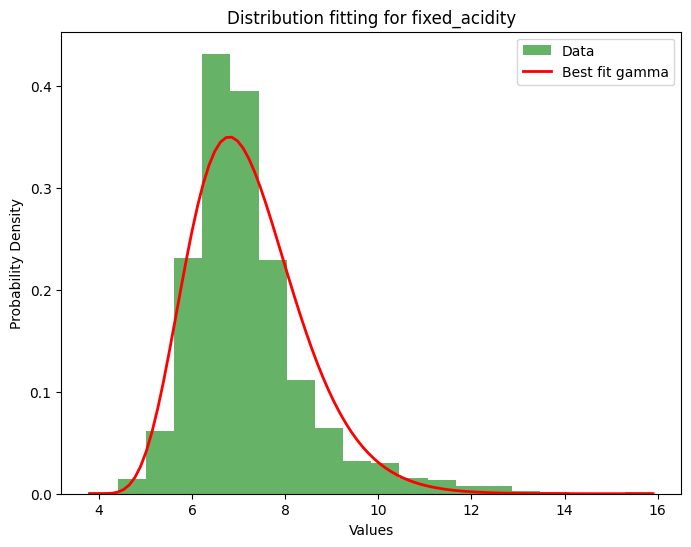

Best fitting distribution for fixed_acidity: gamma
Parameters: (8.49752401576691, 3.714988731799087, 0.41192205131970705)


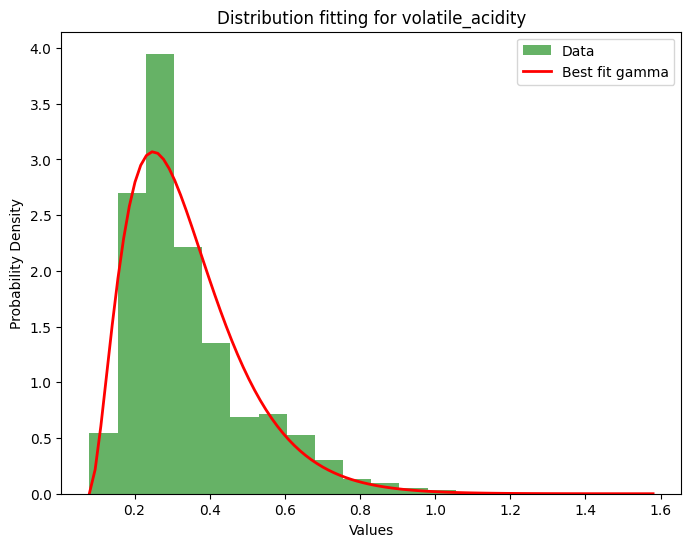

Best fitting distribution for volatile_acidity: gamma
Parameters: (2.9015778010330013, 0.07780040202378244, 0.09024914330907205)


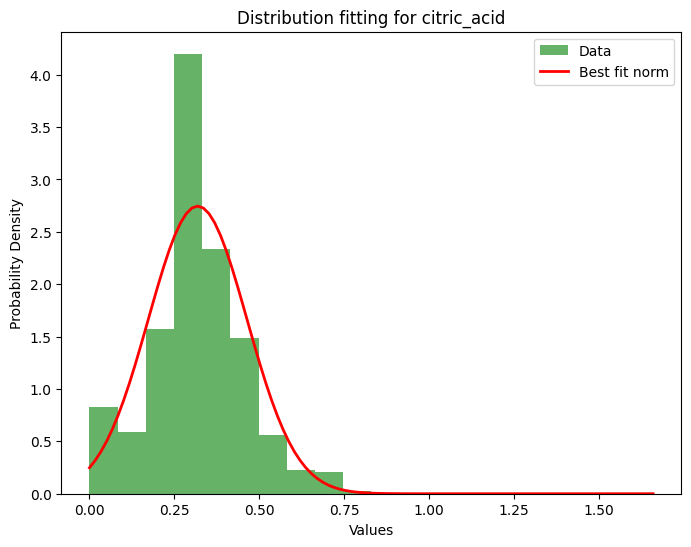

Best fitting distribution for citric_acid: norm
Parameters: (0.3186332153301524, 0.14530668100833052)


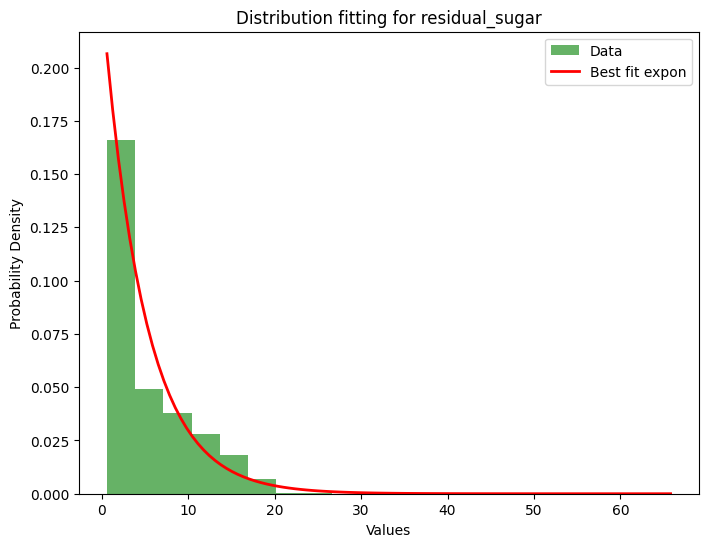

Best fitting distribution for residual_sugar: expon
Parameters: (0.6, 4.84323533938741)


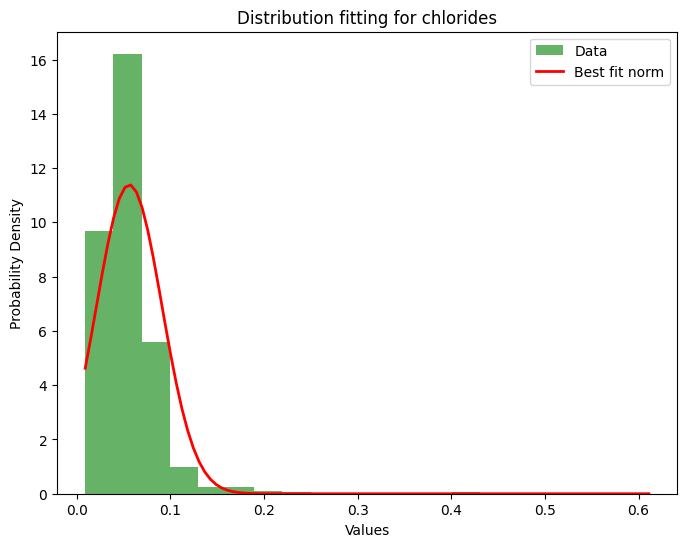

Best fitting distribution for chlorides: norm
Parameters: (0.05603386178236109, 0.03503090513192154)


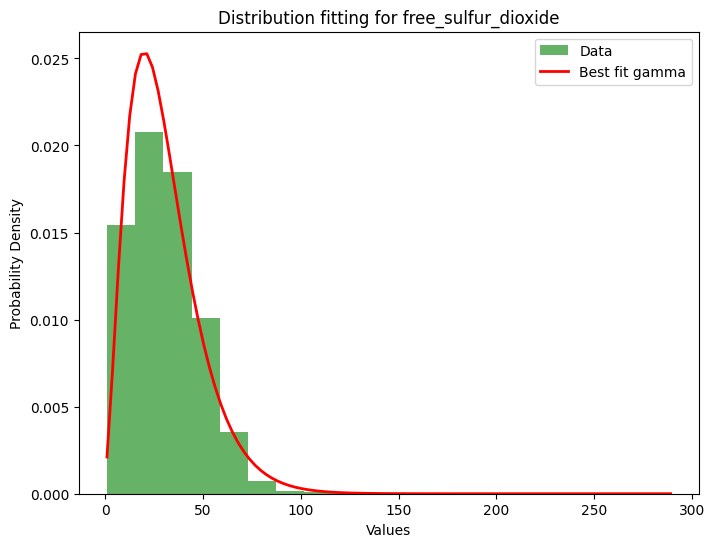

Best fitting distribution for free_sulfur_dioxide: gamma
Parameters: (3.0689194475076187, -1.7225160126284527, 10.505020066188568)


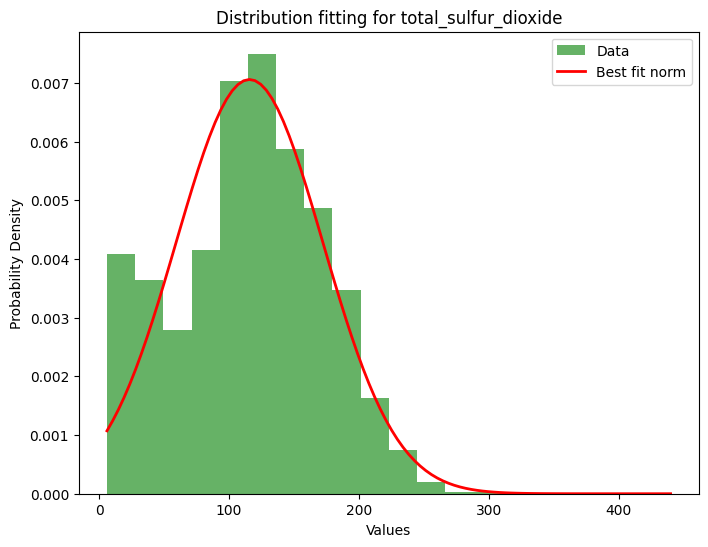

Best fitting distribution for total_sulfur_dioxide: norm
Parameters: (115.7445744189626, 56.51750451265558)


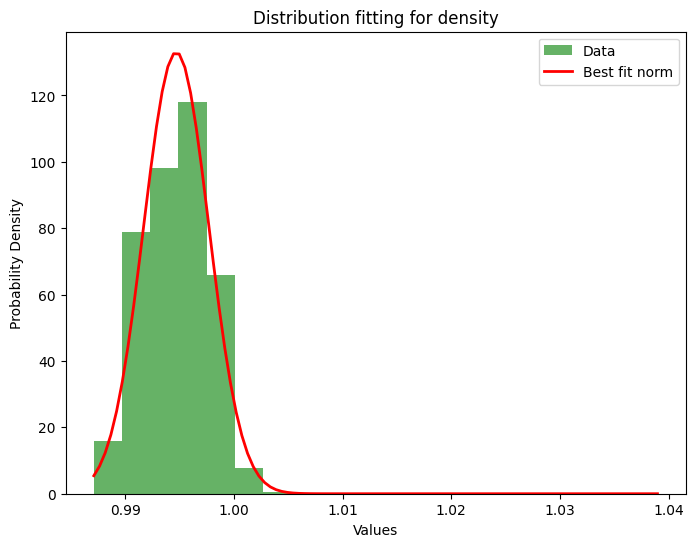

Best fitting distribution for density: norm
Parameters: (0.9946966338309989, 0.0029984422211732924)


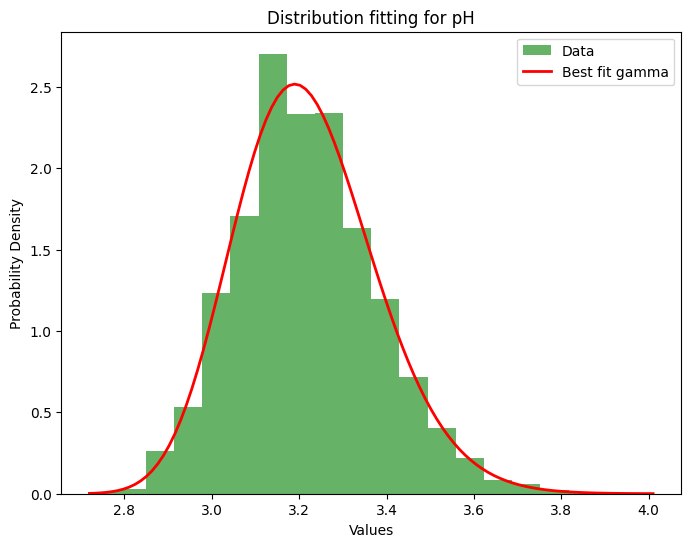

Best fitting distribution for pH: gamma
Parameters: (31.360133205663082, 2.3188959933266693, 0.02868625810877176)


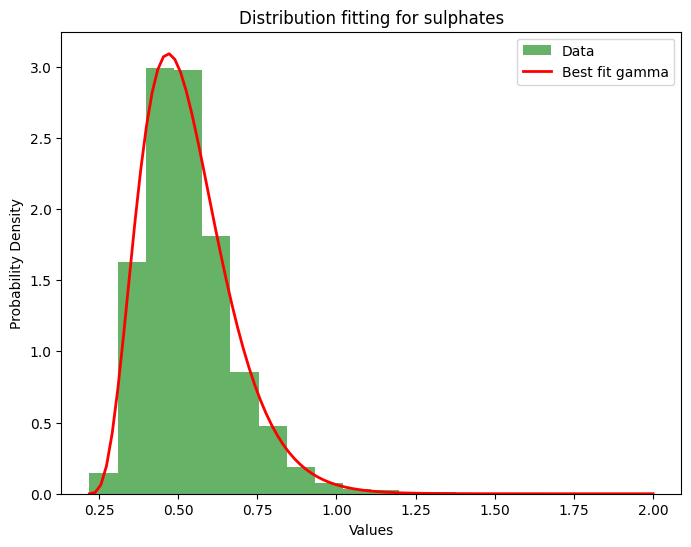

Best fitting distribution for sulphates: gamma
Parameters: (5.067565872906007, 0.2135301221085663, 0.06270034256760751)


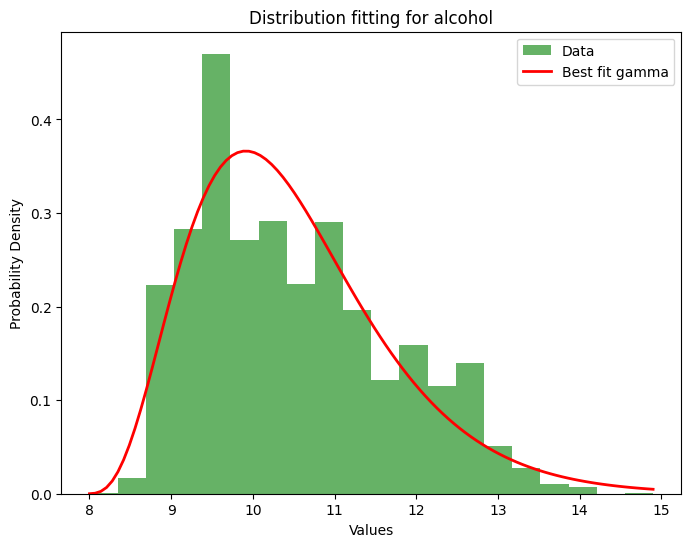

Best fitting distribution for alcohol: gamma
Parameters: (4.386358641522145, 7.958499413408559, 0.5775412806088085)

Total distribution counts:
norm: 4
expon: 1
gamma: 6


In [15]:
# --- PROBABILITY DISTRIBUTION CLASSIFICATION ---
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

distributions = ['norm', 'expon', 'gamma']

# Initialize a dictionary to store counts of each distribution
distribution_counts = {dist_name: 0 for dist_name in distributions}

# Loop through each column in your DataFrame
for column in df.columns:
    data = df[column].dropna()  # Remove missing values if any
    
    # Fit each distribution to the data
    best_fit_name = ''
    best_fit_params = {}
    best_kstest_stat = np.inf
    
    for dist_name in distributions:
        dist = getattr(stats, dist_name)
        params = dist.fit(data)
        kstest_stat, _ = stats.kstest(data, dist_name, args=params)
        
        # Keep track of the best-fitting distribution based on KS test statistic
        if kstest_stat < best_kstest_stat:
            best_fit_name = dist_name
            best_fit_params = params
            best_kstest_stat = kstest_stat
    
    # Increment the count for the best-fitting distribution
    distribution_counts[best_fit_name] += 1
    
    # Plot the histogram of data and the best-fitting distribution
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=20, density=True, alpha=0.6, color='g', label='Data')
    
    dist = getattr(stats, best_fit_name)
    x = np.linspace(min(data), max(data), 100)
    pdf = dist.pdf(x, *best_fit_params)
    plt.plot(x, pdf, 'r-', lw=2, label='Best fit ' + best_fit_name)
    
    plt.title('Distribution fitting for {}'.format(column))
    plt.xlabel('Values')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

    print('Best fitting distribution for {}: {}'.format(column, best_fit_name))
    print('Parameters:', best_fit_params)

# summary of # of occurences for each distribution
print('\nTotal distribution counts:')
for dist_name, count in distribution_counts.items():
    print('{}: {}'.format(dist_name, count))

In [25]:
# Create summary statistics
summary_stats = df.describe(include='all')
print(summary_stats)


       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [35]:
# Hypothesis test (t-test)
# Null hypothesis: The means of the two groups are equal
# Alternative hypothesis: The means of the two groups are different

red_wine = df[df['color'] == 'red']['alcohol']
white_wine = df[df['color'] == 'white']['alcohol']

def t_test(group1, group2):
    n1, n2 = len(group1), len(group2)
    mean1, mean2 = np.mean(group1), np.mean(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    
    # Calculate the t-statistic
    t_stat = (mean1 - mean2) / np.sqrt(var1/n1 + var2/n2)
    
    # Calculate degrees of freedom
    df = ((var1/n1 + var2/n2)**2) / (((var1/n1)**2)/(n1-1) + ((var2/n2)**2)/(n2-1))
    
    # Calculate p-value
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df))
    
    return t_stat, df, p_value

t_stat, degrees_of_freedom, p_value = t_test(red_wine, white_wine)
print(f'T-statistic: {t_stat}, Degrees of freedom: {degrees_of_freedom}, P-value: {p_value}')

# Decision based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in alcohol content between red and white wines.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in alcohol content between red and white wines.")

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol color  quality  
0      9.4   red        5  
1      9.8   red        5  
2 

TypeError: unsupported operand type(s) for +: 'float' and 'str'